## Monthly Short Term Interest Rate Prediction
Data: 1973 - 2023
Potential Predictors: 'Personal Income', 'Industrial Production', 'Money Supply- Currency/Demand Deposit/Traveller Check', 'Money Supply- Deposit'

## Research Question and Rationale

### Research Question:

We include the following economic indicators in our analysis to answer the question:

**How do various economic indicators, including Personal Income, GDP, Consumer Prices, Industrial Production, and Consumer Confidence, influence or correlate with changes in interest rates in the United States?**

### Rationale for Including Each Data Point:

1. **Personal Income (Percent change vs. 1 period ago - annualized):**
   - **Rationale:** We incorporate Personal Income data to gauge the financial well-being of individuals. Changes in personal income can influence consumer spending and saving behavior, which, in turn, can impact the overall economy and interest rates. This data provides insights into the economic health of individuals.

2. **GDP (Latest Median):**
   - **Rationale:** Gross Domestic Product (GDP) is a key indicator of a nation's economic performance. It measures the total value of goods and services produced in a country. Changes in GDP can indicate economic growth or contraction, and these changes often lead to monetary policy adjustments, including changes in interest rates.

3. **Consumer Prices (U.S. Bureau of Labor Statistics):**
   - **Rationale:** Consumer prices, as measured by inflation, have a direct impact on interest rates. Central banks often use interest rates to control inflation. An increase in consumer prices can lead to higher interest rates, and a decrease can result in lower rates. Monitoring inflation is essential for understanding interest rate movements.

4. **Industrial Production (Federal Reserve System):**
   - **Rationale:** Industrial production is a measure of the output of the industrial sector, including manufacturing, mining, and utilities. Changes in industrial production can indicate shifts in economic activity, which can, in turn, influence interest rates. A strong industrial sector may lead to increased borrowing and higher interest rates.

5. **Consumer Confidence (The Conference Board):**
   - **Rationale:** Consumer confidence reflects the sentiment and outlook of consumers about the economy. High consumer confidence can lead to increased spending and borrowing, affecting the demand for loans and potentially leading to changes in interest rates. Monitoring consumer confidence helps assess economic sentiment.

By including these data points in our analysis, we aim to explore the relationship between various economic indicators and interest rates. This research can help identify potential causal factors, correlations, and trends that provide valuable insights into the dynamics of the financial markets and monetary policy in the United States.


In [1]:
#!pip install numpy pandas statsmodels matplotlib scikit-learn pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## Use Dates as indexes

In [2]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()  # allows using dates for indexing

In [3]:
# from interesrate.csv, read the following columns into df: Date, Short Term Interest Rates, Personal Income,	Consumer Prices(Inflation,)	Industrial Production,	Consumer Confidence,	Money Supply- Currency/Demand Deposit/Traveller Check,	Money Supply- Deposit

df_orig = pd.read_csv(
    "interestdata.csv",
    parse_dates=["Date"],
    index_col=["Date"],
    usecols=[
        "Date",
        "Short Term Interest Rates",
        "Personal Income",
        "Industrial Production",
        "Money Supply- Currency/Demand Deposit/Traveller Check",
        "Money Supply- Deposit",
    ],
)

In [4]:
df = df_orig.copy()
df.dropna(inplace=True)

In [5]:
df.describe()

,Short Term Interest Rates,Personal Income,Industrial Production,Money Supply- Currency/Demand Deposit/Traveller Check,Money Supply- Deposit
count,601.000000,601.000000,601.000000,601.000000,601.000000
mean,4.965740,8.120665,77.174078,2531.943759,6484.538940
std,3.916953,38.881432,21.191365,4592.027031,5431.025780
min,0.090000,-81.049850,39.952099,257.899994,839.299988
25%,1.340000,3.376319,55.053501,633.500000,2533.100098
50%,5.150000,5.888639,84.951599,1118.500000,4267.600098
75%,7.030000,8.804394,97.978798,1896.500000,8943.500000
max,18.650000,867.957458,104.118103,20664.199220,21703.599610


## Comparison Plots

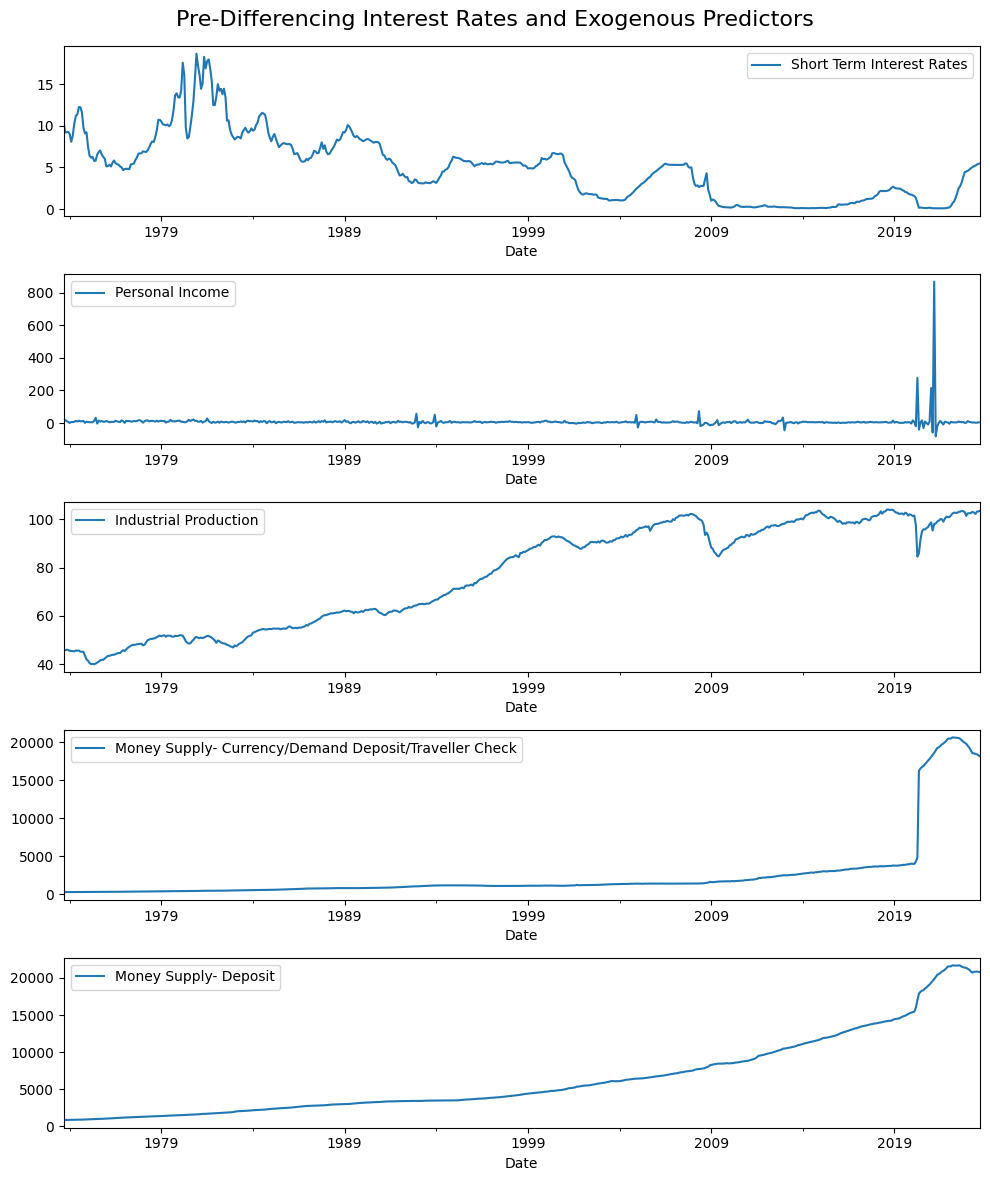

In [6]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(10, 12))

# Add a title to the figure
fig.suptitle("Pre-Differencing Interest Rates and Exogenous Predictors", fontsize=16)

# Plot each series in df on a separate subplot
for ax, column in zip(axes, df.columns):
    df[column].plot(ax=ax, legend=True)


# Automatically adjust subplot params so that the subplot fits into the figure area
plt.tight_layout()

# Adjust the top of the subplot area so that there is space for the title
plt.subplots_adjust(top=0.95)

# Display the plot
plt.show()

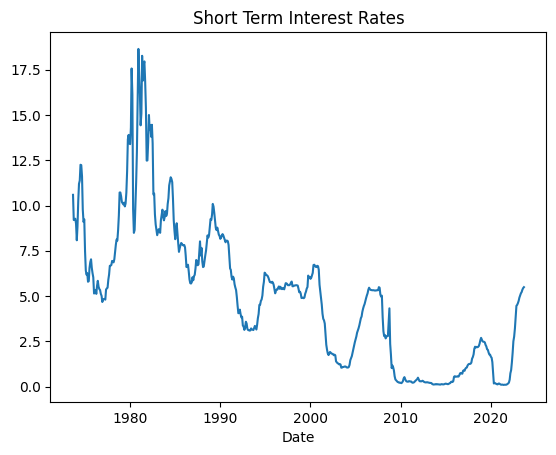

In [7]:
plt.plot(df.index, df["Short Term Interest Rates"])
plt.title("Short Term Interest Rates")
plt.xlabel("Date")
plt.show()

## Assessing Stationarity of Data
Augmented Dickey-Fuller (ADF) test: This is a statistical test that checks for the presence of a unit root in the time series data. A unit root indicates that the data is non-stationary. If the p-value of the test is less than a chosen significance level (e.g., 0.05), then the null hypothesis of a unit root is rejected and the data is considered stationary.

In [8]:
from statsmodels.tsa.stattools import adfuller

for column in df.columns:
    result = adfuller(df[column])
    print(f"Stationarity test for variable {column}")
    print("ADF Statistic: %f" % result[0])
    print("p-value: %f" % result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print("\t%s: %.3f" % (key, value))
    print("\n")

Stationarity test for variable Short Term Interest Rates
ADF Statistic: -2.285402
p-value: 0.176719
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.569


Stationarity test for variable Personal Income
ADF Statistic: -5.777286
p-value: 0.000001
Critical Values:
	1%: -3.442
	5%: -2.866
	10%: -2.569


Stationarity test for variable Industrial Production
ADF Statistic: -0.411676
p-value: 0.908131
Critical Values:
	1%: -3.442
	5%: -2.866
	10%: -2.569


Stationarity test for variable Money Supply- Currency/Demand Deposit/Traveller Check
ADF Statistic: -3.552925
p-value: 0.006727
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


Stationarity test for variable Money Supply- Deposit
ADF Statistic: -6.070609
p-value: 0.000000
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.569




We find that the data isnt stationary. To address that before going into our time-series modelling, we use Differencing: This involves taking the difference between consecutive observations in the time series. This can help remove trends and seasonality in the data.

In [9]:
variables = [
    "Short Term Interest Rates",
    "Personal Income",
    "Industrial Production",
    "Money Supply- Currency/Demand Deposit/Traveller Check",
    "Money Supply- Deposit",
]

diff_df = pd.DataFrame()

for var in variables:
    diff_df[var] = df[var].diff()

# Drop the first row which is NaN due to differencing
diff_df = diff_df.dropna()

After the transformation the data exhibits stationarity as the p-value is lower than 0.05 and the ADF Statistic is lower than the 1% mark so we can proceed with our time-series modelling
________________________________________

The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are used to identify the order of the AR (Autoregressive) and MA (Moving Average) terms in an ARIMA model.

The ACF plot shows the correlation between the time series and its lagged values. The PACF plot shows the correlation between the time series and its lagged values, after removing the effects of the intermediate lags.

Here's how to interpret the ACF and PACF plots:

ACF plot: If the ACF plot shows a sharp drop-off after a certain lag, it suggests that the time series is stationary and an AR model may be appropriate. If the ACF plot shows a gradual decay, it suggests that the time series may be non-stationary and a differencing operation may be required.

PACF plot: If the PACF plot shows a sharp drop-off after a certain lag, it suggests that an AR model may be appropriate. If the PACF plot shows a gradual decay, it suggests that an MA model may be appropriate.

Combined ACF and PACF plots: If the ACF plot shows a gradual decay and the PACF plot shows a sharp drop-off after a certain lag, it suggests that an ARMA model may be appropriate.

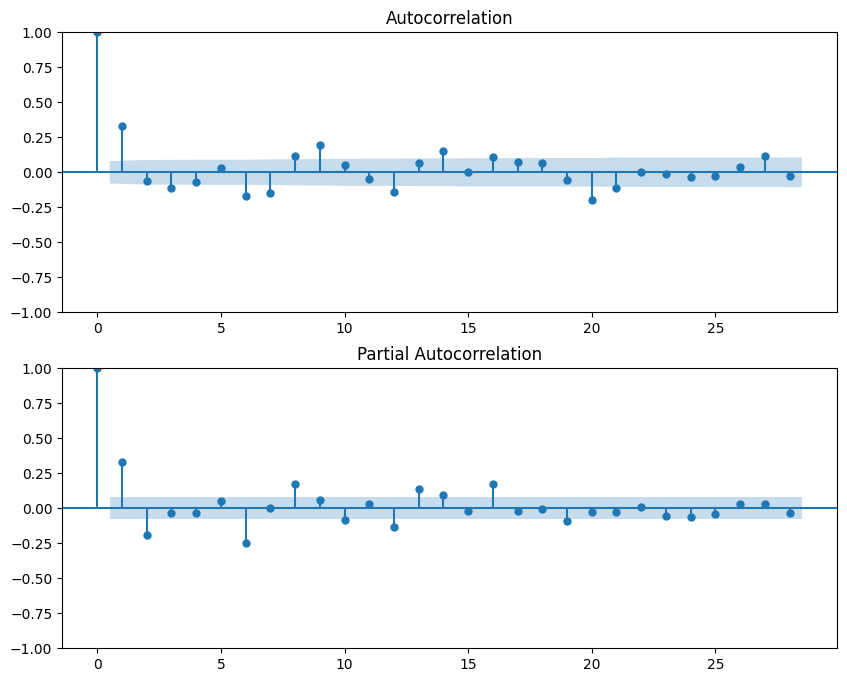

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and PACF of the differenced time series
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(diff_df["Short Term Interest Rates"], ax=ax[0])
plot_pacf(diff_df["Short Term Interest Rates"], ax=ax[1])
plt.show()

### Final Dataframe has the following Columns:

In [11]:
for i in diff_df.columns:
    print(f"{i} with {df[i].count()} observations")

Short Term Interest Rates with 601 observations
Personal Income with 601 observations
Industrial Production with 601 observations
Money Supply- Currency/Demand Deposit/Traveller Check with 601 observations
Money Supply- Deposit with 601 observations


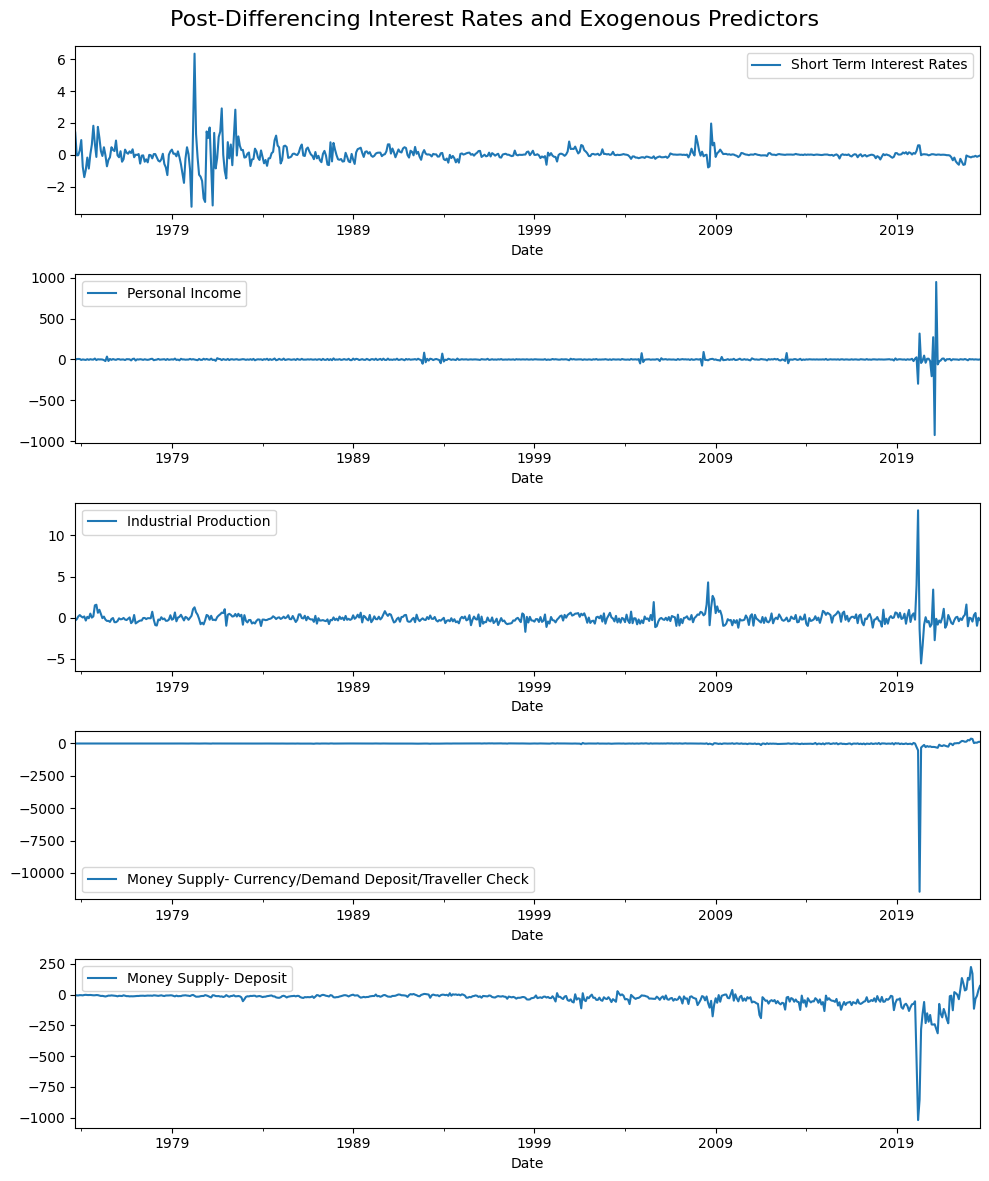

In [12]:
fig, axes = plt.subplots(nrows=len(diff_df.columns), figsize=(10, 12))

# Add a title to the figure
fig.suptitle("Post-Differencing Interest Rates and Exogenous Predictors", fontsize=16)

# Plot each series in df on a separate subplot
for ax, column in zip(axes, diff_df.columns):
    diff_df[column].plot(ax=ax, legend=True)


# Automatically adjust subplot params so that the subplot fits into the figure area
plt.tight_layout()

# Adjust the top of the subplot area so that there is space for the title
plt.subplots_adjust(top=0.95)

# Display the plot
plt.show()

The desired task is to predict the future interest rate using previous observations. Feel free to use either the original version or the differentiated version (labeled as "Diff Short Term Interest Rates") which exhibits better stationarity.

In [13]:
# using scikit learn, split my data into training and testing sets (80/20) and make the test set the last 20% of the data

diff_df = diff_df.dropna()
diff_df = diff_df.sort_values(by=["Date"], ascending=True)
from sklearn.model_selection import train_test_split

ARtrain_data, ARtest_data = train_test_split(diff_df, test_size=0.2, shuffle=False)

# Introduction to ARIMA for Time Series Forecasting

ARIMA, which stands for AutoRegressive Integrated Moving Average, is a widely used forecasting method for univariate time series data forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

1. **p (Autoregressive part)**: It incorporates the effect of past values into our model. Essentially, this part of the model suggests that the output variable depends linearly on its own previous values.

2. **d (Integrated part)**: This includes terms in the model that incorporate the amount of differencing to apply to a time series.

3. **q (Moving average part)**: This allows the regression error to be a linear combination of error terms whose values occurred contemporaneously and at various times in the past.

The ARIMA model works well on time series data that is stationary, which means the statistical properties of the series like mean, variance, autocorrelation, etc. are constant over time. 

# Rationale for Using ARIMA

The data we are working with can be considered as a time series. The ARIMA model is a good choice for this task because it can capture a suite of different standard temporal structures in time series data. 

The model can be tuned to meet the specifics of our dataset by changing the parameters (p, d, q) in the model. This makes ARIMA a flexible method that can be used for a wide range of time series data in various practical scenarios.

______________________________________

In this block below, we are performing a grid search to find the best parameters for an ARIMA model that forecasts short term interest rates. 

The ARIMA model is a type of time series model that combines differencing, autoregression, and a moving average model. It is defined by three parameters: p (the order of the autoregressive part), d (the order of differencing), and q (the order of the moving average part). 

We start by defining the range of values for p, d, and q as any integer between 0 and 2. We then generate all possible combinations of these three parameters.

Next, we initialize variables to store the best AIC (Akaike Information Criterion) value and the corresponding parameters. The AIC is a measure of the relative quality of a statistical model, with a lower AIC indicating a better model.

We then loop over all combinations of parameters. For each combination, we try to fit an ARIMA model to the training data. If the model fit is successful and its AIC is lower than the current best AIC, we update the best AIC and the best parameters.

After the grid search, we print the best parameters and the corresponding AIC. We then fit an ARIMA model with the best parameters to the training data and use it to generate forecasts for the test data.

The purpose of this script is to find the best ARIMA model for forecasting short term interest rates. By performing a grid search over a range of parameters, we can find the model that best fits our data according to the AIC.

In [14]:
import warnings

warnings.filterwarnings("ignore")

In [15]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Determine exogenous predictors
exogenous_predictors_train = ARtrain_data[
    [
        "Personal Income",
        "Industrial Production",
        "Money Supply- Currency/Demand Deposit/Traveller Check",
        "Money Supply- Deposit",
    ]
]
exogenous_predictors_test = ARtest_data[
    [
        "Personal Income",
        "Industrial Production",
        "Money Supply- Currency/Demand Deposit/Traveller Check",
        "Money Supply- Deposit",
    ]
]

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
best_aic = np.inf
best_pdq = None
temp_model = ARIMA(
    ARtrain_data["Short Term Interest Rates"],
    exog=exogenous_predictors_train,
    order=pdq[0],
)

for param in pdq:
    temp_model = ARIMA(
        ARtrain_data["Short Term Interest Rates"],
        exog=exogenous_predictors_train,
        order=param,
    )
    results = temp_model.fit()
    if results.aic < best_aic:
        best_aic = results.aic
        best_pdq = param

print(f"Best ARIMA model is ARIMA{best_pdq} with AIC={best_aic}")

if best_pdq is not None:
    # Fit the best model
    best_model = ARIMA(
        ARtrain_data["Short Term Interest Rates"],
        exog=exogenous_predictors_train,
        order=best_pdq,
    )
    ARIMA_fit = best_model.fit()

    # Generate forecasts for the test data
    ARIMA_forecast = ARIMA_fit.predict(
        start=len(ARtrain_data),
        end=len(ARtrain_data) + len(ARtest_data) - 1,
        exog=exogenous_predictors_test,
    )
else:
    print("Could not find a suitable ARIMA model.")

Best ARIMA model is ARIMA(1, 0, 2) with AIC=814.3499416612253


```Up next, we visualize our results:```

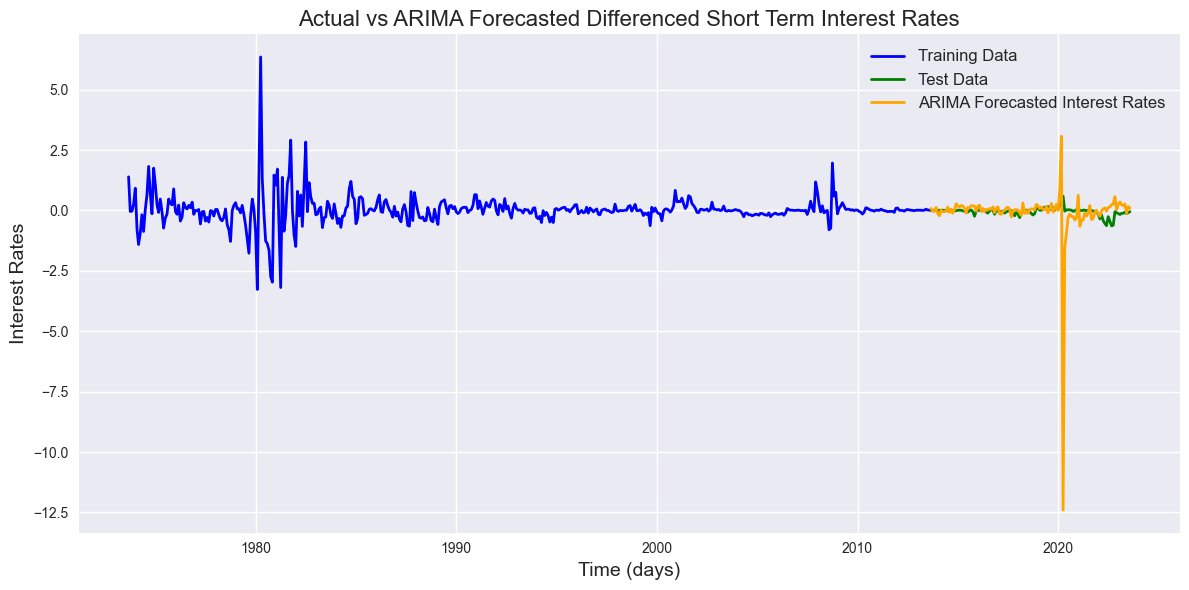

In [16]:
# Set the style of the plot
plt.style.use("seaborn-v0_8")

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the training data
ax.plot(
    ARtrain_data["Short Term Interest Rates"],
    label="Training Data",
    color="blue",
    linewidth=2,
)

# Plot the testing data
ax.plot(
    ARtest_data.index,
    ARtest_data["Short Term Interest Rates"],
    label="Test Data",
    color="green",
    linewidth=2,
)

# Plot the predicted rates
ax.plot(
    ARtest_data.index,
    ARIMA_forecast,
    label="ARIMA Forecasted Interest Rates",
    linewidth=2,
    color="orange",
)

# Set the title and labels
ax.set_title(
    "Actual vs ARIMA Forecasted Differenced Short Term Interest Rates", fontsize=16
)
ax.set_xlabel("Time (days)", fontsize=14)
ax.set_ylabel("Interest Rates", fontsize=14)

# Show the legend
ax.legend(fontsize=12)

# Automatically adjust subplot params so that the subplot fits into the figure area
plt.tight_layout()

# Display the plot
plt.show()

# Save the plot as an image
fig.savefig("ARIMA_result.png")

```We measure model performance using Mean Square Error, Root Mean Square Error, Mean Absolute Error```

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the errors
ARmae = mean_absolute_error(ARtest_data["Short Term Interest Rates"], ARIMA_forecast)
ARmse = mean_squared_error(ARtest_data["Short Term Interest Rates"], ARIMA_forecast)
ARrmse = np.sqrt(ARmse)

print(f"MAE: {ARmae}")
print(f"MSE: {ARmse}")
print(f"RMSE: {ARrmse}")

MAE: 0.3408093866302201
MSE: 1.5535529934695012
RMSE: 1.246416059536101


`We now find the most significant exogenous variables by looking at the p-values of the coefficients in the model. We can see that the most significant variables are the ones with the lowest p-values.
`

In [18]:
# Get the p-values of the coefficients
pvalues = ARIMA_fit.pvalues

# Sort the p-values in ascending order
sorted_pvalues = pvalues.sort_values()

# Print the sorted pvalues
print(sorted_pvalues)

sigma2                                                   5.726911e-224
ma.L2                                                     1.522082e-43
ar.L1                                                     3.770555e-16
Industrial Production                                     2.914468e-06
ma.L1                                                     2.475769e-05
const                                                     2.613310e-01
Money Supply- Currency/Demand Deposit/Traveller Check     8.122958e-01
Money Supply- Deposit                                     8.832322e-01
Personal Income                                           9.526499e-01
dtype: float64


`The p-values of the coefficients in the model indicate the significance of the corresponding variables. A p-value of less than 0.05 is considered statistically significant. The lower the p-value, the more significant the variable is in predicting the target variable. We can see that the most significant variable is Industrial Production, followed bt Money Supply- Currency/Demand Deposit/Traveller Check, Money Supply- Deposit, and Personal Income which is the least significant.`

This Project is a sample for modeling interest rate prediction using a basic MLP neural network using Scikit Learn.  

The data comes from the US Treasury's Daily Treasury Yield found here: https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_real_yield_curve&field_tdr_date_value_month=202309

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

Read Data

In [20]:
# Read in the data
interest_rates = pd.read_csv(r"daily-treasury-rates.csv", parse_dates=["Date"])

Review Data

In [21]:
interest_rates.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2023-09-08,5.52,5.56,5.55,5.60,5.49,5.42,4.98,4.68,4.39,4.35,4.26,4.52,4.33
1,2023-09-07,5.52,5.56,5.53,5.59,5.50,5.40,4.94,4.66,4.38,4.35,4.27,4.55,4.36
2,2023-09-06,5.52,5.55,5.55,5.60,5.52,5.44,5.01,4.73,4.44,4.39,4.30,4.56,4.37
3,2023-09-05,5.51,5.56,5.55,5.59,5.51,5.42,4.94,4.65,4.37,4.35,4.27,4.56,4.38
4,2023-09-01,5.51,5.55,5.53,5.58,5.47,5.36,4.87,4.57,4.29,4.27,4.18,4.48,4.29


In [22]:
interest_rates.shape

(2924, 14)

Drop Missing Values

In [23]:
# drop columns with NAs
interest_rates = interest_rates.dropna(axis=1)

In [24]:
interest_rates.shape

(2924, 12)

In [25]:
interest_rates.head()

,Date,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2023-09-08,5.52,5.55,5.49,5.42,4.98,4.68,4.39,4.35,4.26,4.52,4.33
1,2023-09-07,5.52,5.53,5.50,5.40,4.94,4.66,4.38,4.35,4.27,4.55,4.36
2,2023-09-06,5.52,5.55,5.52,5.44,5.01,4.73,4.44,4.39,4.30,4.56,4.37
3,2023-09-05,5.51,5.55,5.51,5.42,4.94,4.65,4.37,4.35,4.27,4.56,4.38
4,2023-09-01,5.51,5.53,5.47,5.36,4.87,4.57,4.29,4.27,4.18,4.48,4.29


Sort Data

In [26]:
interest_rates = interest_rates.sort_values(by=["Date"], ascending=True)

In [27]:
interest_rates.head()

,Date,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
422,2012-01-03,0.01,0.02,0.06,0.12,0.27,0.40,0.89,1.41,1.97,2.67,2.98
421,2012-01-04,0.01,0.02,0.06,0.12,0.25,0.40,0.89,1.43,2.00,2.71,3.03
420,2012-01-05,0.01,0.02,0.07,0.11,0.27,0.40,0.88,1.43,2.02,2.74,3.06
419,2012-01-06,0.02,0.02,0.05,0.12,0.25,0.40,0.86,1.40,1.98,2.70,3.02
418,2012-01-09,0.01,0.01,0.05,0.11,0.26,0.38,0.85,1.39,1.98,2.70,3.02


Set Lookback Size

In [28]:
lookback_size = 90

Stack Data into Batches

In [29]:
interest_rates.iloc[
    :lookback_size, 1:
].to_numpy()  # transform the first 90 days data (without Date) into 2d array

array([[0.01, 0.02, 0.06, 0.12, 0.27, 0.4 , 0.89, 1.41, 1.97, 2.67, 2.98],
       [0.01, 0.02, 0.06, 0.12, 0.25, 0.4 , 0.89, 1.43, 2.  , 2.71, 3.03],
       [0.01, 0.02, 0.07, 0.11, 0.27, 0.4 , 0.88, 1.43, 2.02, 2.74, 3.06],
       [0.02, 0.02, 0.05, 0.12, 0.25, 0.4 , 0.86, 1.4 , 1.98, 2.7 , 3.02],
       [0.01, 0.01, 0.05, 0.11, 0.26, 0.38, 0.85, 1.39, 1.98, 2.7 , 3.02],
       [0.01, 0.02, 0.05, 0.11, 0.24, 0.37, 0.86, 1.41, 2.  , 2.71, 3.04],
       [0.01, 0.02, 0.05, 0.11, 0.24, 0.34, 0.82, 1.34, 1.93, 2.63, 2.96],
       [0.02, 0.03, 0.06, 0.11, 0.22, 0.35, 0.84, 1.37, 1.94, 2.65, 2.97],
       [0.02, 0.03, 0.06, 0.1 , 0.24, 0.34, 0.8 , 1.32, 1.89, 2.59, 2.91],
       [0.02, 0.03, 0.06, 0.11, 0.21, 0.33, 0.79, 1.31, 1.87, 2.57, 2.89],
       [0.02, 0.03, 0.07, 0.11, 0.24, 0.35, 0.82, 1.34, 1.92, 2.63, 2.96],
       [0.04, 0.05, 0.07, 0.11, 0.26, 0.36, 0.87, 1.43, 2.01, 2.72, 3.05],
       [0.03, 0.05, 0.07, 0.11, 0.26, 0.38, 0.91, 1.47, 2.05, 2.78, 3.1 ],
       [0.03, 0.04, 0.07,

In [30]:
interest_rates.shape[-1]

12

In [31]:
interest_rates.iloc[:lookback_size, 1:].to_numpy().reshape(
    -1, lookback_size, interest_rates.shape[-1] - 1
)

array([[[0.01, 0.02, 0.06, 0.12, 0.27, 0.4 , 0.89, 1.41, 1.97, 2.67,
         2.98],
        [0.01, 0.02, 0.06, 0.12, 0.25, 0.4 , 0.89, 1.43, 2.  , 2.71,
         3.03],
        [0.01, 0.02, 0.07, 0.11, 0.27, 0.4 , 0.88, 1.43, 2.02, 2.74,
         3.06],
        [0.02, 0.02, 0.05, 0.12, 0.25, 0.4 , 0.86, 1.4 , 1.98, 2.7 ,
         3.02],
        [0.01, 0.01, 0.05, 0.11, 0.26, 0.38, 0.85, 1.39, 1.98, 2.7 ,
         3.02],
        [0.01, 0.02, 0.05, 0.11, 0.24, 0.37, 0.86, 1.41, 2.  , 2.71,
         3.04],
        [0.01, 0.02, 0.05, 0.11, 0.24, 0.34, 0.82, 1.34, 1.93, 2.63,
         2.96],
        [0.02, 0.03, 0.06, 0.11, 0.22, 0.35, 0.84, 1.37, 1.94, 2.65,
         2.97],
        [0.02, 0.03, 0.06, 0.1 , 0.24, 0.34, 0.8 , 1.32, 1.89, 2.59,
         2.91],
        [0.02, 0.03, 0.06, 0.11, 0.21, 0.33, 0.79, 1.31, 1.87, 2.57,
         2.89],
        [0.02, 0.03, 0.07, 0.11, 0.24, 0.35, 0.82, 1.34, 1.92, 2.63,
         2.96],
        [0.04, 0.05, 0.07, 0.11, 0.26, 0.36, 0.87, 1.43, 2.01, 2.

In [32]:
# Step 1: Select the first 'lookback_size' rows and all columns except the first one
subset_interest_rates = interest_rates.iloc[:lookback_size, 1:]

# Step 2: Convert the DataFrame subset to a NumPy array
numpy_array = subset_interest_rates.to_numpy()

# Step 3: Get the number of columns in the original DataFrame minus one
num_columns = interest_rates.shape[1] - 1

# Step 4: Reshape the NumPy array
reshaped_array = numpy_array.reshape(-1, lookback_size, num_columns)

# Step 5: Print the shape of the reshaped array
print(reshaped_array.shape)

reshaped_array

(1, 90, 11)


array([[[0.01, 0.02, 0.06, 0.12, 0.27, 0.4 , 0.89, 1.41, 1.97, 2.67,
         2.98],
        [0.01, 0.02, 0.06, 0.12, 0.25, 0.4 , 0.89, 1.43, 2.  , 2.71,
         3.03],
        [0.01, 0.02, 0.07, 0.11, 0.27, 0.4 , 0.88, 1.43, 2.02, 2.74,
         3.06],
        [0.02, 0.02, 0.05, 0.12, 0.25, 0.4 , 0.86, 1.4 , 1.98, 2.7 ,
         3.02],
        [0.01, 0.01, 0.05, 0.11, 0.26, 0.38, 0.85, 1.39, 1.98, 2.7 ,
         3.02],
        [0.01, 0.02, 0.05, 0.11, 0.24, 0.37, 0.86, 1.41, 2.  , 2.71,
         3.04],
        [0.01, 0.02, 0.05, 0.11, 0.24, 0.34, 0.82, 1.34, 1.93, 2.63,
         2.96],
        [0.02, 0.03, 0.06, 0.11, 0.22, 0.35, 0.84, 1.37, 1.94, 2.65,
         2.97],
        [0.02, 0.03, 0.06, 0.1 , 0.24, 0.34, 0.8 , 1.32, 1.89, 2.59,
         2.91],
        [0.02, 0.03, 0.06, 0.11, 0.21, 0.33, 0.79, 1.31, 1.87, 2.57,
         2.89],
        [0.02, 0.03, 0.07, 0.11, 0.24, 0.35, 0.82, 1.34, 1.92, 2.63,
         2.96],
        [0.04, 0.05, 0.07, 0.11, 0.26, 0.36, 0.87, 1.43, 2.01, 2.

In [33]:
stacked_rates = (
    interest_rates.iloc[:lookback_size, 1:]
    .to_numpy()
    .reshape(-1, lookback_size, interest_rates.shape[-1] - 1)
)
for i in range(1, len(interest_rates) - lookback_size):

    stacked_rates = np.append(
        stacked_rates,
        interest_rates.iloc[i : i + lookback_size, 1:]
        .to_numpy()
        .reshape(-1, lookback_size, interest_rates.shape[-1] - 1),
        axis=0,
    )

In [34]:
stacked_rates.shape

(2834, 90, 11)

In [35]:
stacked_rates[1]

array([[0.01, 0.02, 0.06, 0.12, 0.25, 0.4 , 0.89, 1.43, 2.  , 2.71, 3.03],
       [0.01, 0.02, 0.07, 0.11, 0.27, 0.4 , 0.88, 1.43, 2.02, 2.74, 3.06],
       [0.02, 0.02, 0.05, 0.12, 0.25, 0.4 , 0.86, 1.4 , 1.98, 2.7 , 3.02],
       [0.01, 0.01, 0.05, 0.11, 0.26, 0.38, 0.85, 1.39, 1.98, 2.7 , 3.02],
       [0.01, 0.02, 0.05, 0.11, 0.24, 0.37, 0.86, 1.41, 2.  , 2.71, 3.04],
       [0.01, 0.02, 0.05, 0.11, 0.24, 0.34, 0.82, 1.34, 1.93, 2.63, 2.96],
       [0.02, 0.03, 0.06, 0.11, 0.22, 0.35, 0.84, 1.37, 1.94, 2.65, 2.97],
       [0.02, 0.03, 0.06, 0.1 , 0.24, 0.34, 0.8 , 1.32, 1.89, 2.59, 2.91],
       [0.02, 0.03, 0.06, 0.11, 0.21, 0.33, 0.79, 1.31, 1.87, 2.57, 2.89],
       [0.02, 0.03, 0.07, 0.11, 0.24, 0.35, 0.82, 1.34, 1.92, 2.63, 2.96],
       [0.04, 0.05, 0.07, 0.11, 0.26, 0.36, 0.87, 1.43, 2.01, 2.72, 3.05],
       [0.03, 0.05, 0.07, 0.11, 0.26, 0.38, 0.91, 1.47, 2.05, 2.78, 3.1 ],
       [0.03, 0.04, 0.07, 0.12, 0.26, 0.39, 0.93, 1.51, 2.09, 2.82, 3.15],
       [0.02, 0.04, 0.07,

Prepare Data and Outcomes for Modeling

In [36]:
outcome_rates = interest_rates.iloc[
    lookback_size:, 1:
].to_numpy()  # .reshape(-1, 1, interest_rates.shape[-1] - 1)



outcome_rates.shape

(2834, 11)

In [37]:
stacked_rates = stacked_rates.reshape(outcome_rates.shape[0], -1)
stacked_rates.shape

(2834, 990)

In [38]:
# Create a test train split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    stacked_rates, outcome_rates, test_size=0.2, shuffle=False
)

Fit a linear MLP regressor

In [39]:
from sklearn.neural_network import MLPRegressor

MLP_model = MLPRegressor(
    hidden_layer_sizes=(100, 100, 100), max_iter=2000, verbose=True, random_state=42
)
MLP_model.fit(X_train, y_train)

Iteration 1, loss = 0.58242630
Iteration 2, loss = 0.06477471
Iteration 3, loss = 0.02985116
Iteration 4, loss = 0.01894355
Iteration 5, loss = 0.01481857
Iteration 6, loss = 0.01199496
Iteration 7, loss = 0.01017890
Iteration 8, loss = 0.00870493
Iteration 9, loss = 0.00781309
Iteration 10, loss = 0.00703925
Iteration 11, loss = 0.00670915
Iteration 12, loss = 0.00625459
Iteration 13, loss = 0.00682620
Iteration 14, loss = 0.00571507
Iteration 15, loss = 0.00545790
Iteration 16, loss = 0.00495643
Iteration 17, loss = 0.00481965
Iteration 18, loss = 0.00462399
Iteration 19, loss = 0.00452365
Iteration 20, loss = 0.00435842
Iteration 21, loss = 0.00557844
Iteration 22, loss = 0.00483516
Iteration 23, loss = 0.00495908
Iteration 24, loss = 0.00403005
Iteration 25, loss = 0.00358239
Iteration 26, loss = 0.00342466
Iteration 27, loss = 0.00342543
Iteration 28, loss = 0.00339669
Iteration 29, loss = 0.00370401
Iteration 30, loss = 0.00375909
Iteration 31, loss = 0.00300438
Iteration 32, los

MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=42,
             verbose=True)

Evaluate the performance of the MLP Regressor

In [40]:
MLP_model.score(stacked_rates, outcome_rates)

0.9772291371633735

Plot the predictions of the MLP regressor against the actual interest rate data

In [41]:
MLPpredictions = MLP_model.predict(X_test)
MLPpredictions.shape

(567, 11)

In [42]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


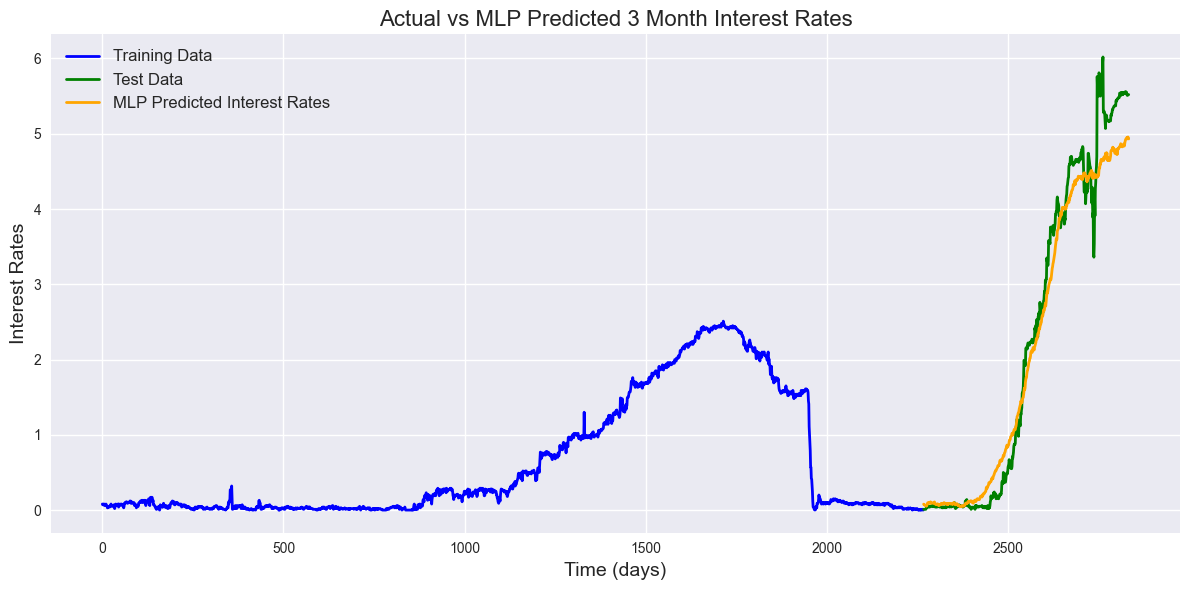

In [43]:
# Set the style of the plot
plt.style.use("seaborn-v0_8")

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the training data
ax.plot(y_train[:, 0], label="Training Data", color="blue", linewidth=2)

# Plot the testing data
ax.plot(
    range(len(y_train[:, 0]), len(y_train[:, 0]) + len(y_test[:, 0])),
    y_test[:, 0],
    label="Test Data",
    color="green",
    linewidth=2,
)

# Plot the predicted rates
ax.plot(
    range(len(y_train[:, 0]), len(y_train[:, 0]) + len(MLPpredictions[:, 0])),
    MLPpredictions[:, 0],
    label="MLP Predicted Interest Rates",
    linewidth=2,
    color="orange",
)

# Set the title and labels
ax.set_title("Actual vs MLP Predicted 3 Month Interest Rates", fontsize=16)
ax.set_xlabel("Time (days)", fontsize=14)
ax.set_ylabel("Interest Rates", fontsize=14)

# Show the legend
ax.legend(fontsize=12)

# Automatically adjust subplot params so that the subplot fits into the figure area
plt.tight_layout()

# Display the plot
plt.show()

# Save the plot as an image
fig.savefig("MLP_result.png")

In [44]:
# Calculate MAE
MLPMAE = mean_absolute_error(y_test, MLPpredictions)

# Calculate MSE
MLPMSE = mean_squared_error(y_test, MLPpredictions)

# Calculate RMSE
MLPRMSE = np.sqrt(MLPMSE)

# Print the results
print(f"MLP MAE: {MLPMAE}")
print(f"MLP MSE: {MLPMSE}")
print(f"MLP RMSE: {MLPRMSE}")

MLP MAE: 0.24956314003396204
MLP MSE: 0.12308167372593708
MLP RMSE: 0.350829978374051


In [45]:
X_train_cnn = X_train.reshape(-1, lookback_size, num_columns)
X_test_cnn = X_test.reshape(-1, lookback_size, num_columns)

`Now we implement a convolutional neural network (CNN) to predict interest rates.`

In [46]:
# Step 1: Import the necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

# Step 2: Create the model

CNNmodel = Sequential()
CNNmodel.add(
    Conv1D(
        filters=64,
        kernel_size=2,
        activation="relu",
        input_shape=(lookback_size, num_columns),
    )
)
CNNmodel.add(MaxPooling1D(pool_size=2))
CNNmodel.add(Flatten())
CNNmodel.add(Dense(50, activation="relu"))
CNNmodel.add(Dense(11))

# Step 3: Compile the model
CNNmodel.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Step 4: Fit the model
CNNmodel.fit(X_train_cnn, y_train, epochs=100, verbose=1)

# Step 5: Evaluate the model
CNNmodel.evaluate(X_test_cnn, y_test, verbose=1)

# Step 6: Make predictions
CNNpredictions = CNNmodel.predict(X_test_cnn)
CNNpredictions.shape





Epoch 1/100


71/71 [==============================] - 1s 3ms/step - loss: 0.2640 - mae: 0.3118
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0280 - mae: 0.1159
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0187 - mae: 0.0945
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0146 - mae: 0.0837
Epoch 5/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0127 - mae: 0.0786
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0115 - mae: 0.0764
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0112 - mae: 0.0764
Epoch 8/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0101 - mae: 0.0726
Epoch 9/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0091 - mae: 0.0686
Epoch 10/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0084 - mae: 0.0662
Epoch 11/100
71/71 [==============================] -

(567, 11)

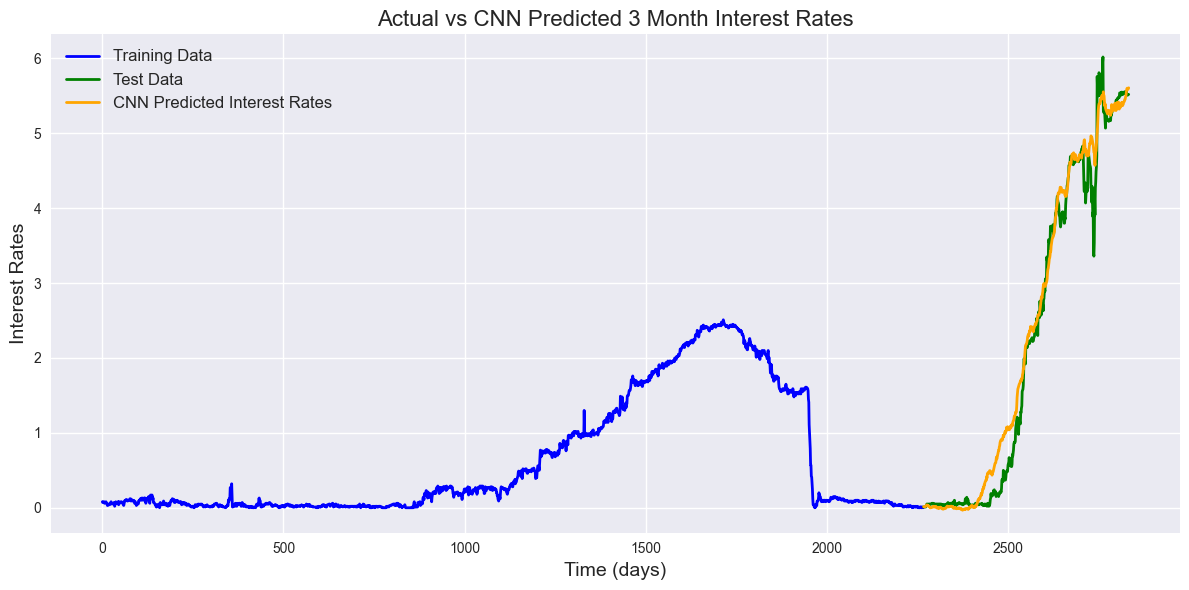

In [47]:
# Set the style of the plot
plt.style.use("seaborn-v0_8")
# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the training data
ax.plot(y_train[:, 0], label="Training Data", color="blue", linewidth=2)

# Plot the testing data
ax.plot(
    range(len(y_train[:, 0]), len(y_train[:, 0]) + len(y_test[:, 0])),
    y_test[:, 0],
    label="Test Data",
    color="green",
    linewidth=2,
)

# Plot the predicted rates
ax.plot(
    range(len(y_train[:, 0]), len(y_train[:, 0]) + len(CNNpredictions[:, 0])),
    CNNpredictions[:, 0],
    label="CNN Predicted Interest Rates",
    linewidth=2,
    color="orange",
)

# Set the title and labels
ax.set_title("Actual vs CNN Predicted 3 Month Interest Rates", fontsize=16)
ax.set_xlabel("Time (days)", fontsize=14)
ax.set_ylabel("Interest Rates", fontsize=14)

# Show the legend
ax.legend(fontsize=12)

# Automatically adjust subplot params so that the subplot fits into the figure area
plt.tight_layout()

# Display the plot
plt.show()

# Save the plot as an image
fig.savefig("CNN_result.png")

In [48]:
# Assuming CNNpredictions are your model predictions

# Calculate MAE
CNNMAE = mean_absolute_error(y_test, CNNpredictions)

# Calculate MSE
CNNMSE = mean_squared_error(y_test, CNNpredictions)

# Calculate RMSE
CNNRMSE = np.sqrt(CNNMSE)

# Print the results
print(f"CNN MAE: {CNNMAE}")
print(f"CNN MSE: {CNNMSE}")
print(f"CNN RMSE: {CNNRMSE}")

CNN MAE: 0.2529309495310967
CNN MSE: 0.13783784858945547
CNN RMSE: 0.37126519980932154


`Now we implement a Long Short-Term Memory (LSTM) neural network to predict interest rates.`

In [49]:
# Step 1: Import the necessary libraries

from tensorflow.keras.layers import LSTM

# Step 2: Create the model
LSTMmodel = Sequential()

LSTMmodel.add(
    LSTM(
        50,
        activation="relu",
        return_sequences=True,
        input_shape=(lookback_size, num_columns),
    )
)
LSTMmodel.add(LSTM(50, activation="relu"))
LSTMmodel.add(Dense(11))

# Step 3: Compile the model
LSTMmodel.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Step 4: Fit the model
LSTMmodel.fit(X_train_cnn, y_train, epochs=100, verbose=1)

# Step 5: Evaluate the model
LSTMmodel.evaluate(X_test_cnn, y_test, verbose=1)

# Step 6: Make predictions
LSTMpredictions = LSTMmodel.predict(X_test_cnn)

# Concatenate the actual and predicted interest rates
actual_rates = np.concatenate((y_train[:, 1], y_test[:, 1]))
predicted_rates = np.concatenate((y_train[:, 1], LSTMpredictions[:, 1]))

Epoch 1/100
71/71 [==============================] - 5s 41ms/step - loss: 2.2380 - mae: 1.1511
Epoch 2/100
71/71 [==============================] - 3s 40ms/step - loss: 0.2228 - mae: 0.3247
Epoch 3/100
71/71 [==============================] - 3s 40ms/step - loss: 0.0282 - mae: 0.1296
Epoch 4/100
71/71 [==============================] - 3s 40ms/step - loss: 0.0208 - mae: 0.1108
Epoch 5/100
71/71 [==============================] - 3s 42ms/step - loss: 0.0167 - mae: 0.0987
Epoch 6/100
71/71 [==============================] - 3s 45ms/step - loss: 0.0137 - mae: 0.0887
Epoch 7/100
71/71 [==============================] - 3s 44ms/step - loss: 0.0119 - mae: 0.0819
Epoch 8/100
71/71 [==============================] - 3s 43ms/step - loss: 0.0100 - mae: 0.0743
Epoch 9/100
71/71 [==============================] - 3s 42ms/step - loss: 0.0082 - mae: 0.0668
Epoch 10/100
71/71 [==============================] - 3s 46ms/step - loss: 0.0071 - mae: 0.0626
Epoch 11/100
71/71 [=============================

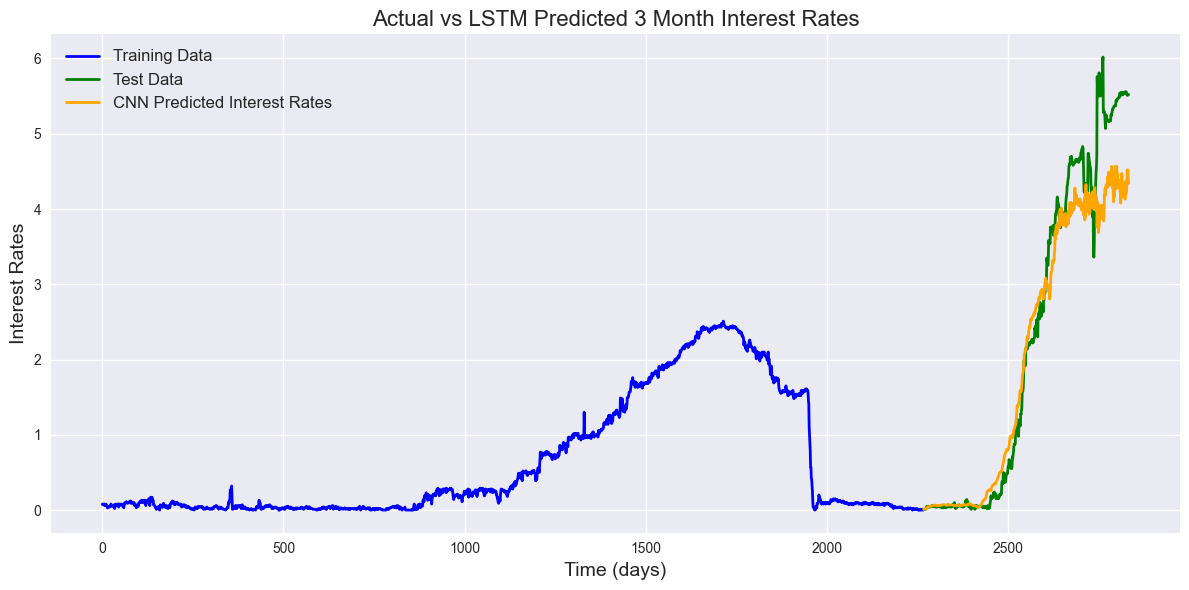

In [50]:
# Set the style of the plot
plt.style.use("seaborn-v0_8")
# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the training data
ax.plot(y_train[:, 0], label="Training Data", color="blue", linewidth=2)

# Plot the testing data
ax.plot(
    range(len(y_train[:, 0]), len(y_train[:, 0]) + len(y_test[:, 0])),
    y_test[:, 0],
    label="Test Data",
    color="green",
    linewidth=2,
)

# Plot the predicted rates
ax.plot(
    range(len(y_train[:, 0]), len(y_train[:, 0]) + len(LSTMpredictions[:, 0])),
    LSTMpredictions[:, 0],
    label="CNN Predicted Interest Rates",
    linewidth=2,
    color="orange",
)

# Set the title and labels
ax.set_title("Actual vs LSTM Predicted 3 Month Interest Rates", fontsize=16)
ax.set_xlabel("Time (days)", fontsize=14)
ax.set_ylabel("Interest Rates", fontsize=14)

# Show the legend
ax.legend(fontsize=12)

# Automatically adjust subplot params so that the subplot fits into the figure area
plt.tight_layout()

# Display the plot
plt.show()

# Save the plot as an image
fig.savefig("LSTM_result.png")

In [51]:
# Calculate MAE
LSTMMAE = mean_absolute_error(y_test, LSTMpredictions)

# Calculate MSE
LSTMMSE = mean_squared_error(y_test, LSTMpredictions)

# Calculate RMSE
LSTMRMSE = np.sqrt(LSTMMSE)

# Print the results
print(f"LSTM MAE: {LSTMMAE}")
print(f"LSTM MSE: {LSTMMSE}")
print(f"LSTM RMSE: {LSTMRMSE}")

LSTM MAE: 0.27358410252915505
LSTM MSE: 0.17710922877712465
LSTM RMSE: 0.4208434730123834


In [52]:
# Create a dictionary with error metrics
data = {
    "Model": ["ARIMA", "MLP", "CNN", "LSTM"],
    "MAE": [ARmae, MLPMAE, CNNMAE, LSTMMAE],
    "MSE": [ARmse, MLPMSE, CNNMSE, LSTMMSE],
    "RMSE": [ARrmse, MLPRMSE, CNNRMSE, LSTMRMSE],
}

# Create a DataFrame from the dictionary
df_errors = pd.DataFrame(data)

# Print the DataFrame
df_errors

,Model,MAE,MSE,RMSE
0,ARIMA,0.340809,1.553553,1.246416
1,MLP,0.249563,0.123082,0.350830
2,CNN,0.252931,0.137838,0.371265
3,LSTM,0.273584,0.177109,0.420843
